<a href="https://colab.research.google.com/github/RJbalikian/SPRIT-HVSR/blob/main/SPRIT_EXAMPLE_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SpRIT HVSR Data Processing Examples

The sprit package can be used in Google Colab to effectively run data. However, all of the data is saved on the 'virtual' google computer you are using, so you will need to make sure to download or otherwise save any data you want to keep whenever using Google Colab.

By default, Google Colab has python and most of the python dependencies already installed. However, it does not have the main seismic package that sprit uses in the background (obspy) installed. So, when you tell Google colab to install sprit, it will also install obspy and any other dependencies it does not already have installed. Note that:

**YOU WILL NEED TO CLICK THE RESTART RUNTIME BUTTON AFTER INSTALLATION DUE TO COMPATABILITY ISSUES BETWEEN OBSPY AND GOOGLE COLAB!**

You must do this before running any subsequent cells. This only needs to be done once per Google Colab session.

The first thing we do is install sprit using the `!pip install sprit` command (the exclamation point at the start indicates that this is a terminal command)

In [ ]:
!pip install sprit

Again, Obpsy (one of the main dependencies of sprit) has a module name that overlaps with an existing module on the default Google Colab setup, so you need to restart the runtime to reconfigure it. The easiest way to do this is to push the RESTART RUNTIME button. This will not close your notebook, but you will need to wait until after clicking this button to run any further cells.

# Basic processing using sample data

Let' s practice the very basics of processing data in sprit using the sample data. Run the following cell (it takes about 8 or 9 seconds usually)

In [ ]:
import sprit
hvsrData = sprit.run("sample2")

# Verbose outputs

To see better what is going on "under the hood", you can add verbose outputs that will print the inputs and outputs along the way.

In [ ]:
import sprit
hvsrData = sprit.run("sample", verbose=True)

Gathering input parameters (input_params())
	  site=HVSR Site
	  net=AM
	  sta=RAC84
	  loc=00
	  cha=['EHZ', 'EHN', 'EHE']
	  instrument=Raspberry Shake
	  acq_date=2023-11-06
	  starttime=2023-11-06T00:00:00.000000Z
	  endtime=2023-11-06T23:59:59.999999Z
	  timezone=UTC
	  longitude=-88.2290526
	  latitude=40.1012122
	  elevation=755
	  input_crs=EPSG:4326
	  output_crs=EPSG:4326
	  depth=0
	  datapath=sample
	  metapath=/usr/local/lib/python3.10/dist-packages/sprit/resources/rs3dv5plus_metadata.inv
	  hvsr_band=[0.4, 40]
	  peak_freq_range=[0.4, 40]
	  ProcessingStatus={'InputStatus': True, 'OverallStatus': True}

		input_params completed in  0:00:00.569

Fetching data (fetch_data())

	 3 Trace(s) in Stream:
	 AM.RAC84.00.EHE | 2023-02-15T17:04:42.080000Z - 2023-02-15T17:34:00.000000Z | 100.0 Hz, 175793 samples
	 AM.RAC84.00.EHN | 2023-02-15T17:04:42.080000Z - 2023-02-15T17:34:00.000000Z | 100.0 Hz, 175793 samples
	 AM.RAC84.00.EHZ | 2023-02-15T17:04:42.080000Z - 2023-02-15T17:34:00

# Batch processing

Data can be processed in batch using sprit. Let's practice this with the six sample datasets provided. Setting verbose=True will allow us to see the progress as well as a printed version of the input csv file. Note that some of the inputs have been left blank in the input csv file. Default values are used in this instance. This usually takes about 45 seconds to process.

In [ ]:
import sprit
hvsrBatch = sprit.run("sample", source='batch', verbose=True)

Gathering input parameters (input_params())
	  site=HVSR Site
	  net=AM
	  sta=RAC84
	  loc=00
	  cha=['EHZ', 'EHN', 'EHE']
	  instrument=Raspberry Shake
	  acq_date=2023-11-06
	  starttime=2023-11-06T00:00:00.000000Z
	  endtime=2023-11-06T23:59:59.999999Z
	  timezone=UTC
	  longitude=-88.2290526
	  latitude=40.1012122
	  elevation=755
	  input_crs=EPSG:4326
	  output_crs=EPSG:4326
	  depth=0
	  datapath=sample
	  metapath=/usr/local/lib/python3.10/dist-packages/sprit/resources/rs3dv5plus_metadata.inv
	  hvsr_band=[0.4, 40]
	  peak_freq_range=[0.4, 40]
	  ProcessingStatus={'InputStatus': True, 'OverallStatus': True}

		input_params completed in  0:00:00.072
	6 sites found: ['SampleHVSRSite1', 'SampleHVSRSite2', 'SampleHVSRSite3', 'SampleHVSRSite4', 'SampleHVSRSite5', 'SampleHVSRSite6']

	datapath      site          source        acq_date      starttime     endtime       tzone         xcoord        ycoord        elevation     input_crs     
	---------------------------------------------

# Jupyter GUI

Open notebook in playground mode first, then run the next cells (File > Open in playground mode)

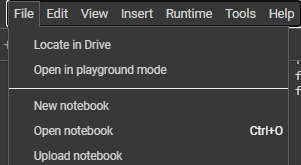

In [ ]:
!pip install sprit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.8 MB/s eta 0:00:00


In [ ]:
import sprit
from google.colab import output
output.disable_custom_widget_manager()
sprit.gui('nb')



———————————————————————————————————————————————————————————————————————————————————————————————————
=                                            HVSR_Site                                            =
———————————————————————————————————————————————————————————————————————————————————————————————————

	Site Name: HVSR_Site
	Acq. Date: 2023-02-15
	Location : -88.2290526, 40.1012122
	Elevation: 755.0

  –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––  

	2.778 Hz Peak Frequency
	  ✔ Curve at 2.778 Hz passed quality checks! ☺ :D

  –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––  

	Curve Tests: 3/3 passed (3/3 needed)
		 ✔ Length of processing windows     2.778 > 0.5 (10 / 20)  ✔
		 ✔ Number of significant cycles     9667 > 200  ✔
		 ✔ Small H/V StDev over time        H/V Amp. St.Dev. for 1.389-5.556Hz < 2  ✔

	Peak Tests: 6/6 passed (5/6 needed)
		 ✔ Peak is prominent below          Amp. of H

# Report formats

It may be helpful to see your data in various formats. Up until now, we have only generated a print report. However, plots and csv files may also be useful as outputs, and the data itself may be useful to save and use for later. For this, we will need to specify what kinds of reports to output and where to output them.

For the report_format parameter, we will pass a list of formats. It will generate each of those included in the list ('print', 'plot', and 'csv' are currently the only supported formats). Specifying True for the export_path parameter tells sprit to first try to save the data in the same directory as the input data. Since this is sample data, we do not want to save data in the package itself, so in this case, it will then try to save data in the current working directory. If that is also in a place where it cannot or should not save, it will then save to the home directory.

In Google colab, it will save to the main directory "/content".

In addition to saving the reports, whenever export_path is designated (either as True or as a filepath), it will also save a "pickled" version of your data object itself as a .hvsr file.

After running the cell below, you should have a png plot, a csv output of your data and whether it passed the tests, and a .hvsr file which is a copy of the hvsrData variable in a file format.


Fetching data (fetch_data())

	 3 Trace(s) in Stream:
	 AM.RAC84.00.EHE | 2023-02-15T17:04:42.080000Z - 2023-02-15T17:34:00.000000Z | 100.0 Hz, 175793 samples
	 AM.RAC84.00.EHN | 2023-02-15T17:04:42.080000Z - 2023-02-15T17:34:00.000000Z | 100.0 Hz, 175793 samples
	 AM.RAC84.00.EHZ | 2023-02-15T17:04:42.080000Z - 2023-02-15T17:34:00.000000Z | 100.0 Hz, 175793 samples
		fetch_data completed in  0:00:00.343

Removing noisy data windows (remove_noise())
	Using the following parameters:
	  remove_method=auto
	  sat_percent=0.995
	  noise_percent=0.8
	  sta=2
	  lta=30
	  stalta_thresh=[0.5, 5]
	  warmup_time=0
	  cooldown_time=0
	  min_win_size=1
	  remove_raw_noise=False
	  verbose=True
		remove_noise completed in  0:00:00.984

Generating Probabilistic Power Spectral Densities (generate_ppsds())
	Using the following parameters:
	  remove_outliers=True
	  outlier_std=3
	  verbose=True
	  ppsd_kwargs={'skip_on_gaps': True, 'db_bins': (-200, -50, 1.0), 'ppsd_length': 30.0, 'overlap': 0.5, 's

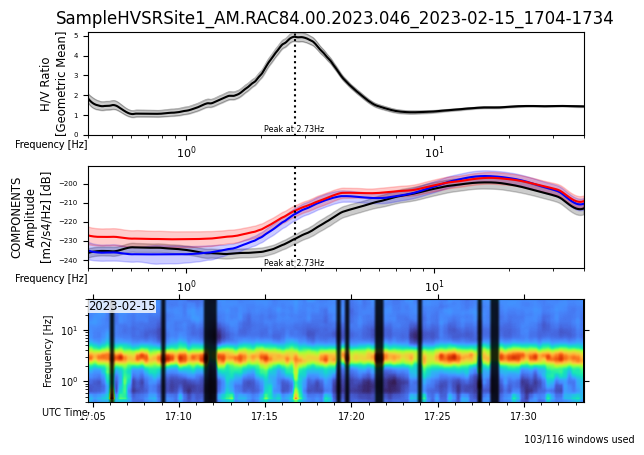


CSV Report:

  Site Name      Acq_Date       Longitude      Latitide       Elevation      PeakFrequency  WindowLeng...  Significan...  LowCurveSt...  PeakPromin...  PeakPromin...  PeakAmpCla...  FreqStability  PeakStabil...  PeakStabil...  PeakPasses     
|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|
  SampleHVSR...  2023-02-15     -88.2290526    40.1012122     755            2.734          True           True           True           True           True           True           True           False          True           True           

Saving csv data to: /content/SampleHVSRSite1_AM.RAC84.00.2023.046_2023-02-15_1704-1734_2023-02-15_1704-1734.csv


In [ ]:
import sprit
hvsrData = sprit.run("sample", report_format=['print', 'plot', 'csv'], export_path=True)

# Command line interface: just so you know!

Jupyter notebooks can also run terminal commands. To do this, preface your command with ! (there are also ["magic" text](https://ipython.readthedocs.io/en/stable/interactive/magics.html) commands that can be specified).

For us, we can run the command line of sprit as well from Google Colab notebooks. Here is an example of the same output as the above command, only carried out using command line. (note that there are no spaces between the list of report formats).

We are technically accessing another computer when using Google Colab, and that computer technically does not have a display, so the sprit graphical user interface (GUI) cannot be accessed through Google colab.

In [ ]:
!sprit "sample2" --report_format 'print','plot','csv' --export_path True

# Using Instrument files (.inst)

Often, multiple instruments are used by a person or organization to acquire HVSR data. Because these instruments will have different input settings and the input of parameters can be a time-consuming task, SpRIT supports the reading in of a .inst file that already has the instrument parameters. The .inst file is just a json file, but when this file is generated by SpRIT (instrument settings can be export after processing), the suffix or extension .inst is given.

The instrument file for the sample data is here: https://drive.google.com/file/d/1tU6WS52MdO6TemlYf_b7-mlvOzTghHaC/view?usp=drive_link

You will also need the metadata file. It is available here: https://drive.google.com/file/d/1f5Kzx-TJP9VUxYDtkpIP4zi6MljbTmpq/view?usp=drive_link

You will need to download these files then upload them into main directory of your colab file system. If it is uploaded in the main directory (/content/), the filepath below should work. The metadata file should also be placed in this directory.

In [ ]:
import sprit
instPath = r"/content/RAC84_instrument_settings.inst"
sprit.run(datapath="sample", instrument=instPath, verbose=True)

Gathering input parameters (input_params())
	  site=HVSR Site
	  net=AM
	  sta=RAC84
	  loc=00
	  cha=['EHZ', 'EHN', 'EHE']
	  instrument=Raspberry Shake
	  acq_date=2023-12-07
	  starttime=2023-12-07T00:00:00.000000Z
	  endtime=2023-12-07T23:59:59.999999Z
	  timezone=UTC
	  longitude=-88.2290526
	  latitude=40.1012122
	  elevation=755
	  input_crs=EPSG:4326
	  output_crs=EPSG:4326
	  depth=0
	  datapath=sample
	  metapath=None
	  hvsr_band=[0.4, 40]
	  peak_freq_range=[0.4, 40]
	  ProcessingStatus={'InputStatus': True, 'OverallStatus': True}
	  instrument_settings=/content/RAC84_instrument_settings.inst

		input_params completed in  0:00:00.079

Fetching data (fetch_data())



RuntimeError: ignored